## Problema

<p><img style="float: left;margin:5px 20px 3px 1px " src="img/sangue1.jpg" width="300""></p>

<p> Doar sangue salva vidas, isso é divulgado nas mídias sociais, além de ser utilizado para procedimentos e intervenções médicas é utilizado no tratamento de diversas doenças crônicas.</p>


<p> Constantemente os bancos de sangue estão com estoques abaixo da normalidade, principalmente durantes os meses de férias. Com isso Ministério da Saúde reforça periodicamente a importância de adotar uma cultura solidária da doação regular e espontânea de sangue. Mas na prática poucos buscam os postos de doação de forma voluntária, normalmente é incentivado quando um parente ou amigo solicita doação.</p>

<p> Como a doação é voluntárias é difícil para os centros de hemoterapia e hospitais saberem quando um doador irá retornar para doar sangue
</p>



## Explorando os dados

### O dataset

Este conjunto de dados foi doado pelo _Blood Transfusion Service Center_  na cidade de _Hsin-Chu City_ em **Taiwan** em 2008, infelizmente não encontrei nenhuma fonte de dados abertos com algo similar.


Este dataset é disponibilizado pelo [UCI-Blood Transfusion Service Center Data Set
](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center) e 2019 _drivendata.org_ promoveu uma competição com o tema [Warm Up: Predict Blood Donations
](https://www.drivendata.org/competitions/6/countable-care-modeling-womens-health-care-decisions/)


In [9]:
import pandas as pd

In [65]:
cols = ['rec', 'frec', 'total', 'time', 'target']

df = pd.read_csv('data/transfusion.data', names=cols, header=0)

df.head()

,rec,frec,total,time,target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 5 columns):
rec       749 non-null object
frec      749 non-null object
total     749 non-null object
time      749 non-null object
target    749 non-null object
dtypes: object(5)
memory usage: 29.4+ KB


### Descrição das Variáveis:

O dataset contem 749 linhas com dados de dodores com os seguintes dados:

  - rec : meses desde a última doação
  - fre: total número de doações 
  - total : Total de sangue doado
  - time : meses desde primeira doação
  - target : Informação se foi doado ou não

### Explorando

In [8]:
df.head()

,rec,frec,total,time,target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [61]:
df.total.value_counts()

250      158
500      112
750       87
1000      62
1250      62
1500      52
1750      43
2000      31
2250      24
2750      22
2500      14
3000      14
4000      13
3500      13
3250       9
3750       6
4250       4
6000       3
4750       2
5250       2
5500       2
5000       2
8250       1
12500      1
9500       1
11500      1
5750       1
8500       1
6500       1
4500       1
11000      1
10750      1
10250      1
Name: total, dtype: int64

In [11]:
df.describe()

,rec,frec,total,time,target
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


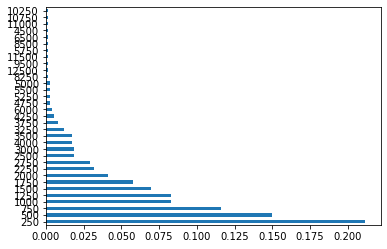

In [14]:
df.total.value_counts(normalize=True).plot(kind='barh')

In [18]:
df.groupby('frec')['total'].mean()

frec
1       250
2       500
3       750
4      1000
5      1250
6      1500
7      1750
8      2000
9      2250
10     2500
11     2750
12     3000
13     3250
14     3500
15     3750
16     4000
17     4250
18     4500
19     4750
20     5000
21     5250
22     5500
23     5750
24     6000
26     6500
33     8250
34     8500
38     9500
41    10250
43    10750
44    11000
46    11500
50    12500
Name: total, dtype: int64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


### Relações

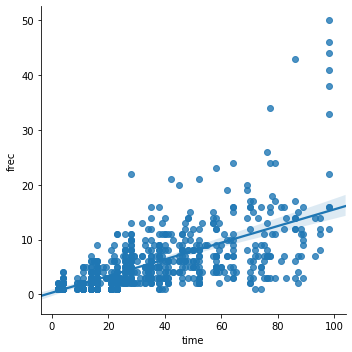

In [30]:
sns.lmplot(x='time', y='frec', data=df)

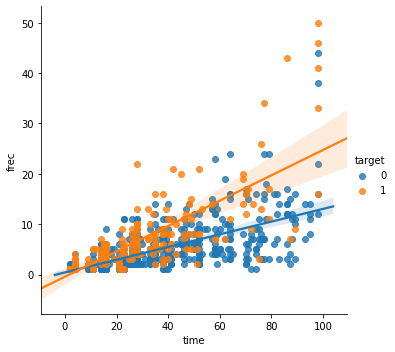

In [32]:
sns.lmplot(x='time', y='frec', hue='target', data=df)

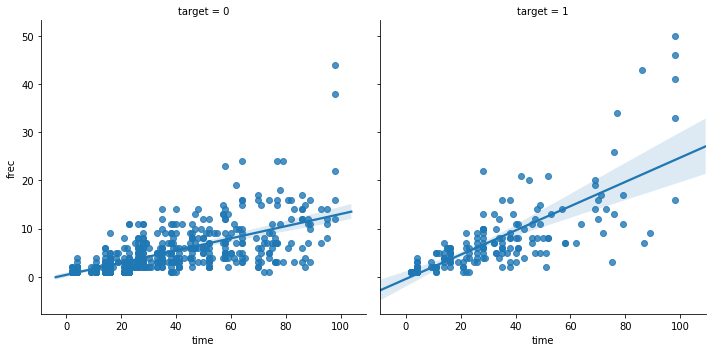

In [33]:
sns.lmplot(x='time', y='frec', col='target', data=df)

### Residuais

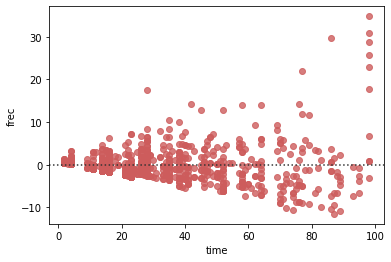

In [36]:
sns.residplot(x='time', y='frec', data=df, color='indianred')

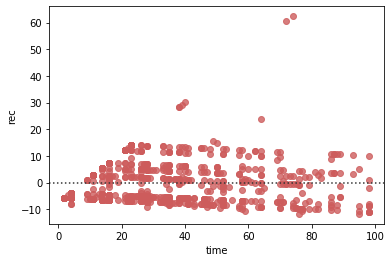

In [37]:
sns.residplot(x='time', y='rec', data=df, color='indianred')

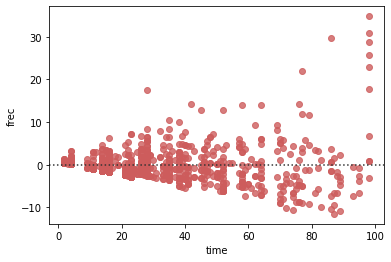

In [38]:
sns.residplot(x='time', y='frec', data=df, color='indianred')

### Reg

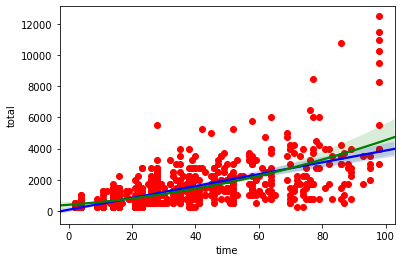

In [44]:
plt.scatter(df.time, df.total, 
            label='data', color='red', marker='o')

sns.regplot(x='time', y='total', data=df,
            color='blue', scatter=None, label='1st Order') 

sns.regplot(x='time', y='total', data=df,
            color='green', order=2 ,scatter=None, label='2nd Order') 

### Distribuição Multivariada

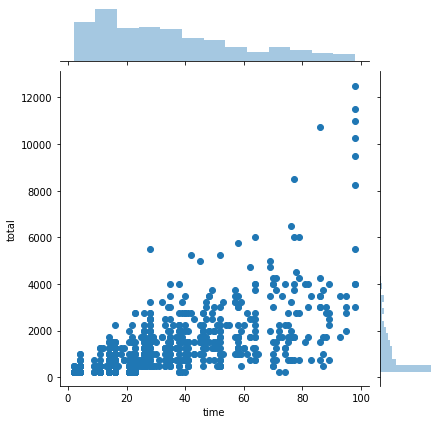

In [45]:
sns.jointplot(x='time', y='total', data=df)


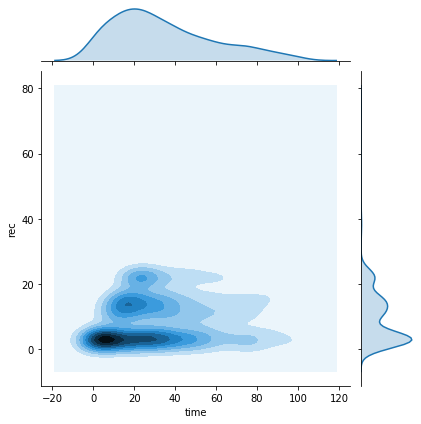

In [51]:
sns.jointplot(x='time', y='rec', data=df, kind='kde')


### Pairplot

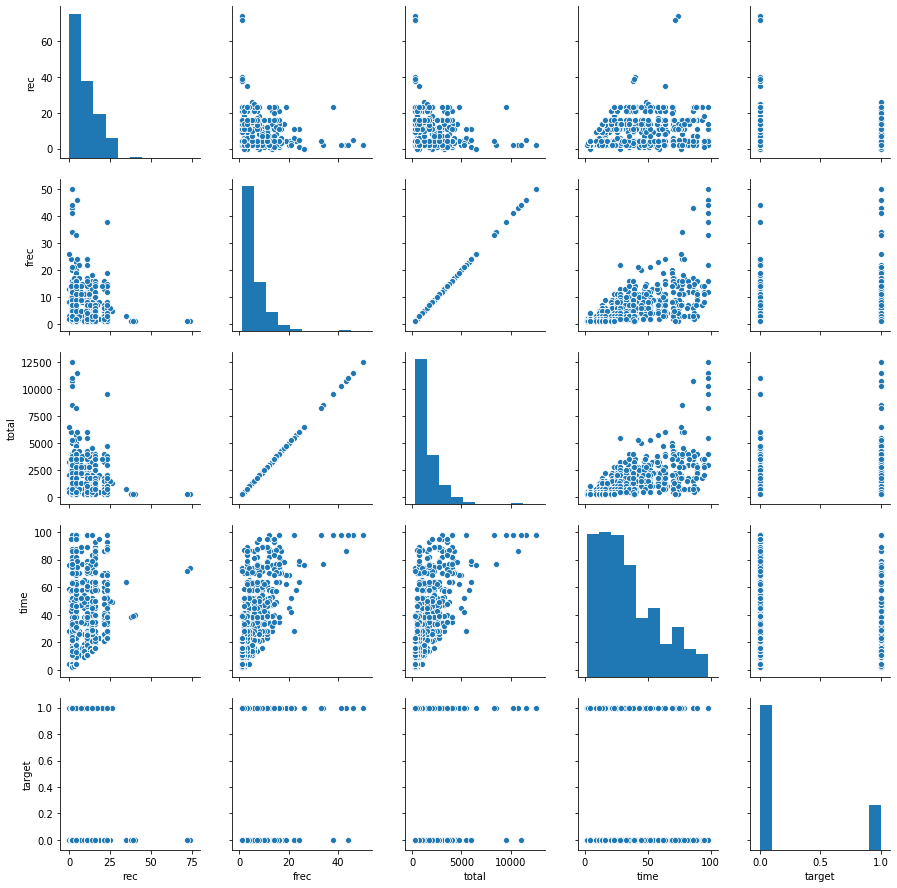

In [49]:
sns.pairplot(df)

/home/bruno/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/bruno/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


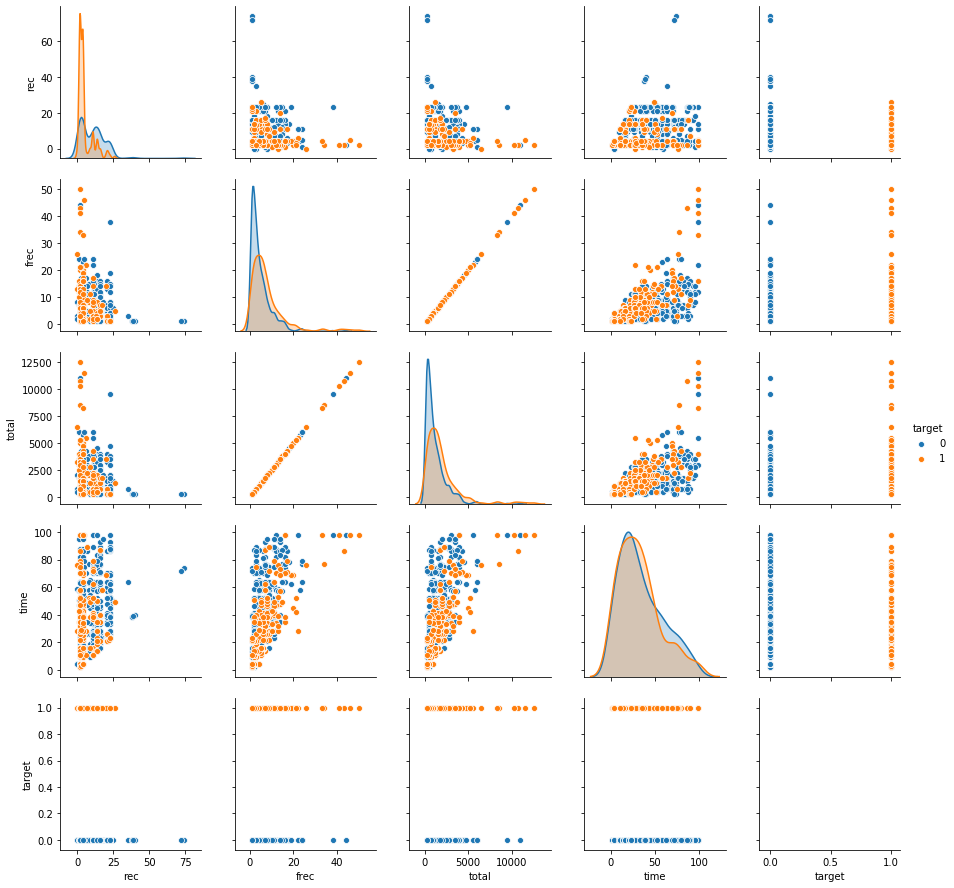

In [52]:
sns.pairplot(df, hue='target')

### Feature Eng

In [67]:
df['time_frec'] = df.time / df.frec
df['time_rec'] = df.time - df.rec
df['total_time'] = df.total / df.time
df.sample(5)

,rec,frec,total,time,target,time_frec,time_rec,total_time
640,11,8,2000,52,1,6.500000,41,38.461538
437,14,3,750,52,0,17.333333,38,14.423077
263,2,3,750,38,1,12.666667,36,19.736842
161,2,1,250,2,0,2.000000,0,125.000000
440,16,3,750,46,0,15.333333,30,16.304348


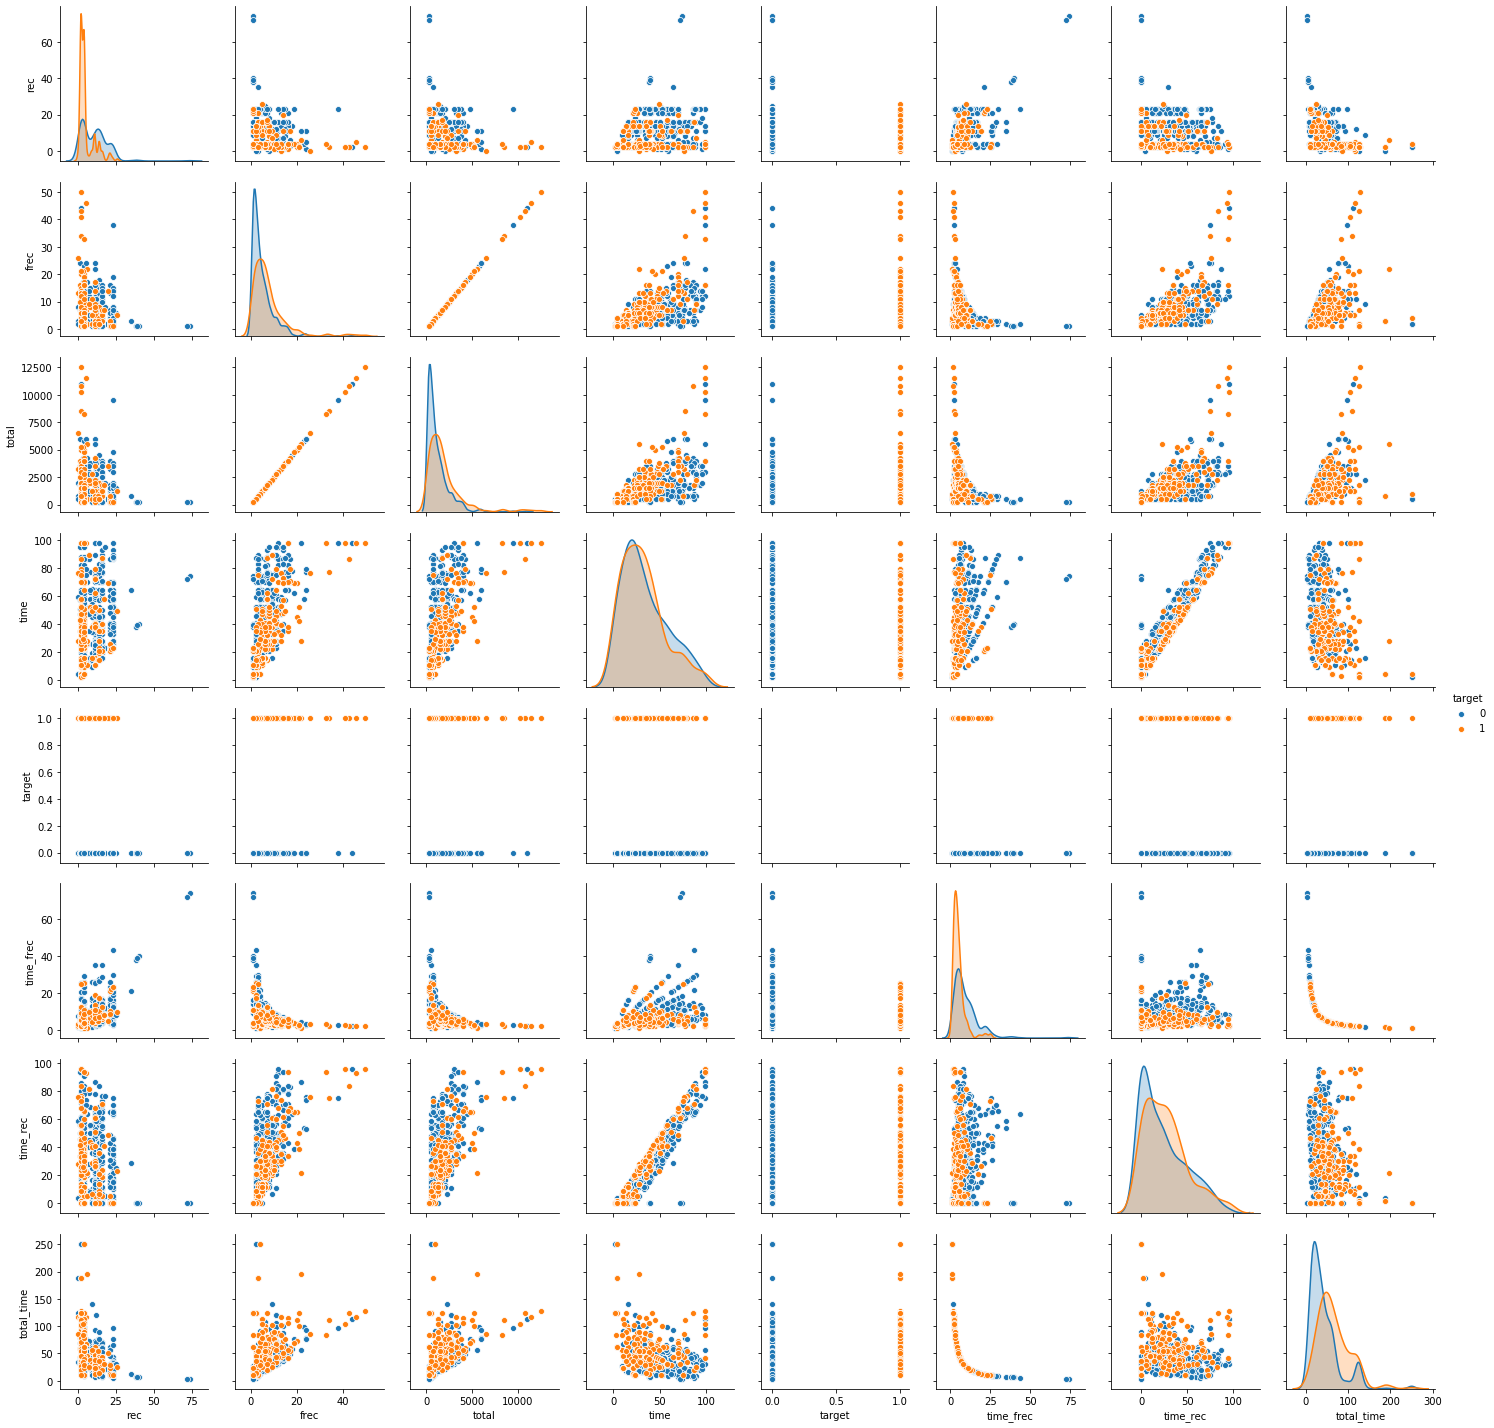

In [68]:
sns.pairplot(df, hue='target')

## Save DataFrame to picckle



In [70]:
df.to_pickle('data/dados.pkl')